# Modelowanie i wymiarowanie systemów jednoprogowych 

In [48]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

In [49]:
amin = 0.2
amax = 1.3
astep = 0.1
a_const = 0.8
Q_min = 8
Q_max = 18

out_txt = "wyniki_1.txt"
C = 20
Q = 15
c0 = np.array([3, 2], dtype=int)
c1 = np.array([2, 1], dtype=int)

m = len(c0)

In [50]:
def calc_ai(a, C, c0, c1, m): # (5) i (6)
    a0 = a * C / (c0 * m)
    a1 = a0 * (c0 / c1)
    return a0, a1

def calc_P(C, Q, c0, c1, a0, a1):
    # oblicz g(n) rekurencyjnie -> normalizacja do P(n)
    g = np.zeros(C + 1, dtype=float)
    g[0] = 1.0

    for n in range(1, C + 1):
        suma = 0.0
        
        for i in range(len(c0)): # część przed progiem (ci,0) -> można gdy (n - ci, 0) <= Q
            prev = n - c0[i]
            if prev >= 0 and prev <= Q:
                suma += a0[i] * c0[i] * g[prev]

        for i in range(len(c1)): # część po progu (ci,1) -> można gdy (n - ci, 1) > Q
            prev = n - c1[i]
            if prev >= 0 and prev > Q:
                suma += a1[i] * c1[i] * g[prev]

        g[n] = suma / n

    P = g / np.sum(g)
    return P

def calc_E(C, Q, c0, c1, P):
    # (4)
    E = np.zeros(len(c0), dtype=float)
    for i in range(len(c0)):
        if Q > C - c1[i]:
            start = C - c0[i] + 1
        else:
            start = C - c1[i] + 1
        if start < 0:
            start = 0
        E[i] = np.sum(P[start:C+1])
    return E

### Zadanie 2.2
Poniżej wygenerowano wykres dla wcześniej zadeklarowanych wartości:
- c0 = np.array([3, 2], dtype=int)
- c1 = np.array([2, 1], dtype=int)

Zapisano: wyniki_1.txt


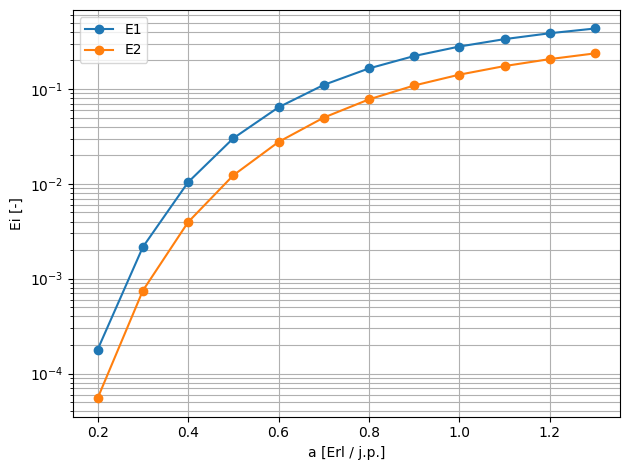

In [51]:
a_values = np.arange(amin, amax + 1e-9, astep)
E_all = np.zeros((len(a_values), m), dtype=float)

for k, a in enumerate(a_values):
    a0, a1 = calc_ai(a, C, c0, c1, m)
    P = calc_P(C, Q, c0, c1, a0, a1)
    E = calc_E(C, Q, c0, c1, P)
    E_all[k, :] = E

# do .txt
with open(out_txt, "w", encoding="utf-8") as f:
    f.write(f"# C={C}, Q={Q}\n")
    f.write(f"# c0={[int(x) for x in c0]}, c1={[int(x) for x in c1]}\n")
    f.write("a\t" + "\t".join([f"E{i+1}" for i in range(m)]) + "\n")
    for k, a in enumerate(a_values):
        line = f"{a:.3f}\t" + "\t".join([f"{E_all[k,i]:.12e}" for i in range(m)]) + "\n"
        f.write(line)
print("Zapisano:", out_txt)

# wykres log
for i in range(m):
    plt.plot(a_values, E_all[:, i], marker="o", label=f"E{i+1}")

plt.yscale("log")
plt.xlabel("a [Erl / j.p.]")
plt.ylabel("Ei [-]")
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
"""
treść pliku wyniki_1.txt przykładowo:
# C=20, Q=15
# c0=[3, 2], c1=[2, 1]
a	E1	E2
0.200	1.789552867849e-04	5.487857640262e-05
0.300	2.157894092066e-03	7.491252778109e-04
0.400	1.040451227243e-02	3.948209861457e-03
0.500	3.026548862099e-02	1.231379010988e-02
0.600	6.422728964468e-02	2.766938788814e-02
0.700	1.105906265962e-01	5.000245273206e-02
0.800	1.650715722823e-01	7.781455490644e-02
0.900	2.230482765652e-01	1.090594044756e-01
1.000	2.808797303285e-01	1.418621099854e-01
1.100	3.362175331145e-01	1.748153144538e-01
1.200	3.877987796876e-01	2.069927096225e-01
1.300	4.351095902702e-01	2.378496770384e-01
"""

'\ntreść pliku wyniki1.txt przykładowo:\n# C=20, Q=15\n# c0=[3, 2], c1=[2, 1]\na\tE1\tE2\n0.200\t1.789552867849e-04\t5.487857640262e-05\n0.300\t2.157894092066e-03\t7.491252778109e-04\n0.400\t1.040451227243e-02\t3.948209861457e-03\n0.500\t3.026548862099e-02\t1.231379010988e-02\n0.600\t6.422728964468e-02\t2.766938788814e-02\n0.700\t1.105906265962e-01\t5.000245273206e-02\n0.800\t1.650715722823e-01\t7.781455490644e-02\n0.900\t2.230482765652e-01\t1.090594044756e-01\n1.000\t2.808797303285e-01\t1.418621099854e-01\n1.100\t3.362175331145e-01\t1.748153144538e-01\n1.200\t3.877987796876e-01\t2.069927096225e-01\n1.300\t4.351095902702e-01\t2.378496770384e-01\n'

### Zadanie 2.3

Zapisano: wyniki_Q.txt


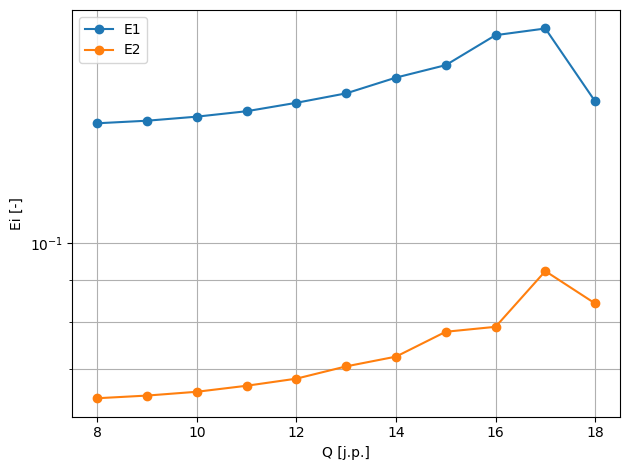

In [52]:
Q_values = np.arange(Q_min, Q_max + 1)
E_Q = np.zeros((len(Q_values), m))

for k, Q_tmp in enumerate(Q_values):
    # zmieniam tylko wartość Q
    a0, a1 = calc_ai(a_const, C, c0, c1, m)
    P = calc_P(C, Q_tmp, c0, c1, a0, a1)
    E = calc_E(C, Q_tmp, c0, c1, P)
    E_Q[k, :] = E

# zapis do TXT
with open("wyniki_Q.txt", "w", encoding="utf-8") as f:
    f.write(f"# C={C}, a={a_const}\n")
    f.write(f"# c0={[int(x) for x in c0]}, c1={[int(x) for x in c1]}\n")
    f.write("Q\t" + "\t".join([f"E{i+1}" for i in range(m)]) + "\n")

    for k, Q_tmp in enumerate(Q_values):
        line = f"{Q_tmp}\t" + "\t".join([f"{E_Q[k,i]:.12e}" for i in range(m)]) + "\n"
        f.write(line)

print("Zapisano: wyniki_Q.txt")

for i in range(m):
    plt.plot(Q_values, E_Q[:, i], marker="o", label=f"E{i+1}")

plt.yscale("log")
plt.xlabel("Q [j.p.]")
plt.ylabel("Ei [-]")
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
"""
treść pliku wyniki_Q.txt przykładowo:
# C=20, a=0.8
# c0=[3, 2], c1=[2, 1]
Q	E1	E2
8	1.401034603347e-01	6.450936614182e-02
9	1.411199439990e-01	6.499688087979e-02
10	1.427452325608e-01	6.569822306444e-02
11	1.449480414856e-01	6.682144927383e-02
12	1.484363231897e-01	6.817457669820e-02
13	1.524448676364e-01	7.057915788412e-02
14	1.593687216011e-01	7.254302007063e-02
15	1.650715722823e-01	7.781455490644e-02
16	1.796271903979e-01	7.890575719725e-02
17	1.830420731989e-01	9.232878051917e-02
18	1.490441635300e-01	8.428099406505e-02
"""

### Zadanie 2.4
Zmiana wartości dla c0 oraz c1

In [53]:
out_txt = "wyniki_2.txt"
C = 20
Q = 15
c0 = np.array([10,7,4,2], dtype=int)
c1 = np.array([7,6,3,1], dtype=int)

m = len(c0)

Zapisano: wyniki_2.txt


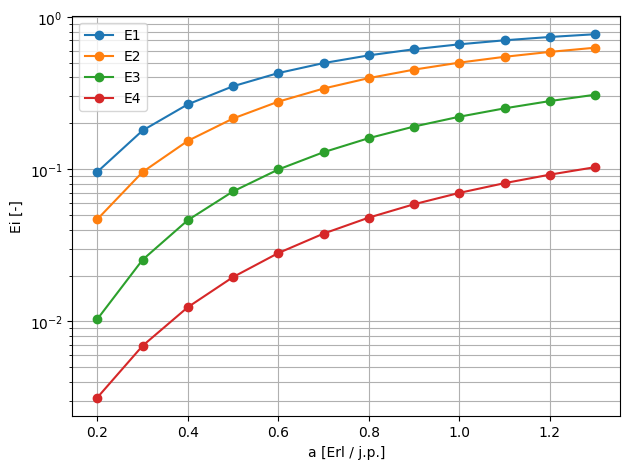

In [54]:
a_values = np.arange(amin, amax + 1e-9, astep)
E_all = np.zeros((len(a_values), m), dtype=float)

for k, a in enumerate(a_values):
    a0, a1 = calc_ai(a, C, c0, c1, m)
    P = calc_P(C, Q, c0, c1, a0, a1)
    E = calc_E(C, Q, c0, c1, P)
    E_all[k, :] = E

# do .txt
with open(out_txt, "w", encoding="utf-8") as f:
    f.write(f"# C={C}, Q={Q}\n")
    f.write(f"# c0={[int(x) for x in c0]}, c1={[int(x) for x in c1]}\n")
    f.write("a\t" + "\t".join([f"E{i+1}" for i in range(m)]) + "\n")
    for k, a in enumerate(a_values):
        line = f"{a:.3f}\t" + "\t".join([f"{E_all[k,i]:.12e}" for i in range(m)]) + "\n"
        f.write(line)
print("Zapisano:", out_txt)

# wykres log
for i in range(m):
    plt.plot(a_values, E_all[:, i], marker="o", label=f"E{i+1}")

plt.yscale("log")
plt.xlabel("a [Erl / j.p.]")
plt.ylabel("Ei [-]")
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
"""
treść pliku wyniki_2.txt przykładowo:
# C=20, Q=15
# c0=[10, 7, 4, 2], c1=[7, 6, 3, 1]
a	E1	E2	E3	E4
0.200	9.598361421977e-02	4.685430191734e-02	1.034894806027e-02	3.160270614471e-03
0.300	1.793913537730e-01	9.572993273733e-02	2.539101803678e-02	6.915216371709e-03
0.400	2.664611656324e-01	1.533882780186e-01	4.624384294877e-02	1.239913272208e-02
0.500	3.502943702410e-01	2.151027318041e-01	7.141741434416e-02	1.955537426735e-02
0.600	4.275861678156e-01	2.774847435379e-01	9.946909720988e-02	2.811298641714e-02
0.700	4.971003027446e-01	3.382930632398e-01	1.292129448861e-01	3.772234034277e-02
0.800	5.587187403659e-01	3.961628498875e-01	1.597553364558e-01	4.804868223911e-02
0.900	6.128807943781e-01	4.503505513806e-01	1.904590639630e-01	5.881575500410e-02
1.000	6.602666366872e-01	5.005295360650e-01	2.208876693476e-01	6.981632589541e-02
1.100	7.016266552479e-01	5.466402029904e-01	2.507523292624e-01	8.090596136813e-02
1.200	7.376946778767e-01	5.887859642406e-01	2.798686726948e-01	9.199057820308e-02
1.300	7.691478997644e-01	6.271637746958e-01	3.081243441128e-01	1.030133083215e-01
"""